# 1.- Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# tipo de algoritmo supervisado de vecinos cercano
# Knn es un agoritmo no parametrico es decir, no rescata ningun dato subyacente

# 2.- Importar dataset

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

db de vinos tintos, sobre su caida en la sepas portuges

In [3]:
df = pd.read_csv('winequality-red.csv', sep=',')

# 3.- Visualización dataframer

In [4]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# 4.- Preprocesamiento

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.describe(include = 'all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# separar matriz de atributo y label
x = df.iloc[:,0:11].values
y = df['quality']

In [9]:
df['quality'].nunique()

6

In [10]:
# normalizacion
x = StandardScaler().fit_transform(x)
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

# 5.- Dividir dataset entre training y testing set

 Se selecciona aleatoriamente el 70% training y 30% testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


# 6.- Modelo K-NN con K=5

In [24]:
# ver como funciona el clasificador de classifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance',algorithm='kd_tree')
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='kd_tree', weights='distance')

In [25]:
# entrega la predicción sobre el testeo
y_pred = classifier.predict(X_test)

# 7.- Cálculo accuracy para K=5

In [15]:
# k = 5 : 63.125
print('Accuracy con k=5 : %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')

Accuracy con k=5 : 63.125 %


# 8.- Buscando el mejor K

In [26]:
err = []

# testear el modelo con distintos datos, variando el numero de vecinos
# err = almacena los valores erroneo de base al ciclo de cada entrenacion

for i in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    err.append(np.mean(y_pred_i != y_test))



# 9.- Plot error rate en la búsqueda de mejor K

Text(0, 0.5, 'Mean Error')

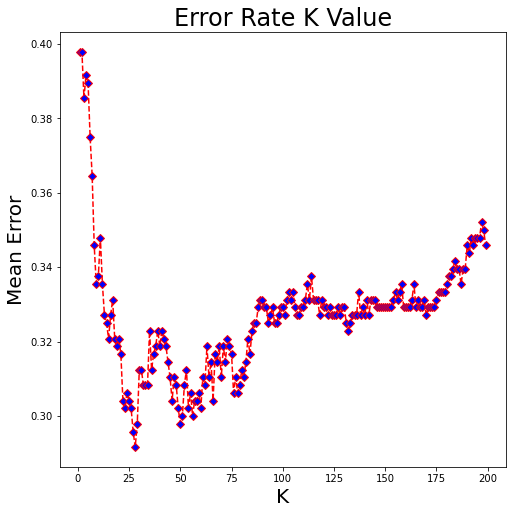

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot() 

ax.plot(range(1, 200), err, color='red', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=5)
ax.set_title('Error Rate K Value',fontsize=24)
ax.set_xlabel('K',fontsize=20)
ax.set_ylabel('Mean Error',fontsize=20)

In [18]:
# buscar el mejor k donde la variable err en su valor minimo
k_optimo = np.where(err==np.min(err))[0][0]+1
print('Mejor k =',k_optimo)

Mejor k = 17


In [28]:
# error medio, donde es el menor error
best_classifier = KNeighborsClassifier(n_neighbors=k_optimo, weights='distance',algorithm='kd_tree')
best_classifier.fit(X_train, y_train)
y_best_pred = best_classifier.predict(X_test)
print('Menor error medio con k=%i : %.3f' % (k_optimo,np.mean(y_best_pred != y_test)*100),'%')


Menor error medio con k=17 : 33.125 %


In [29]:
# k optimo en base al nuevo modelo supervisado Accuracy 
print('Accuracy con k=%i : %.3f' % (k_optimo,metrics.accuracy_score(y_test, y_best_pred)*100),'%')

Accuracy con k=17 : 66.875 %
